<a href="https://colab.research.google.com/github/KuoJeffrey/digitRecognizer/blob/master/lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
train_data_url = "digit-recognizer/train.csv"
train_data = pd.read_csv(train_data_url)

test_data_url = "digit-recognizer/test.csv"
test_data = pd.read_csv(test_data_url)

print(train_data)
print(test_data)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000 rows x 7

In [65]:
train_label = pd.get_dummies(train_data.label)
train_input = train_data.drop('label', axis=1) / 255

x_train, x_val, y_train, y_val = train_test_split(
    train_input, train_label, 
    train_size = 0.8, 
    test_size = 0.2, 
    random_state = 236516
)

x_train = x_train.to_numpy().reshape(33600, 28, 28)
x_val = x_val.to_numpy().reshape(8400, 28, 28)
x_test = test_data.to_numpy().reshape(28000, 28, 28)



print(x_train, x_val)
print(y_train, y_val)
print(x_test)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] [[[0. 0. 0

In [52]:
# model = keras.Sequential([
    
#     # Layer 1
#     layers.Dense(units=576, activation='relu', input_shape=[784]),
#     layers.Dropout(rate=0.3),

#     # Layer 2
#     layers.Dense(units=100, activation='relu'),
#     layers.Dropout(rate=0.3),

#     # Output layer
#     layers.Dense(units=10, activation='softmax')

# ])

model = keras.Sequential([
    
    # Convolution layer
    layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)),

    # Pooling layer
    layers.AveragePooling2D(),

    # Convolution layer
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),

    # Pooling layer
    layers.AveragePooling2D(),

    # Fully connected layer
    layers.Flatten(),
    layers.Dense(units=120, activation='relu'),

    # Fully connected layer
    layers.Dense(units=84, activation="relu"), 

    # Output layer
    layers.Dense(units=10, activation='softmax')

])

model.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 16)        880       
                                                                 
 average_pooling2d_7 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 576)               0         
                                                                 
 dense_61 (Dense)            (None, 120)             

In [51]:
model.compile(
    optimizer = "adam", 
    loss = "categorical_crossentropy", 
    metrics = ["categorical_accuracy"]
)

early_stopping = keras.callbacks.EarlyStopping(
    patience = 10, 
    min_delta = 0.001,
    restore_best_weights = True,
)

history = model.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    batch_size = 64,
    epochs = 100,
    callbacks = [early_stopping],
)

Epoch 1/100
525/525 [==============================] - 14s 25ms/step - loss: 0.3893 - categorical_accuracy: 0.8873 - val_loss: 0.1572 - val_categorical_accuracy: 0.9523
Epoch 2/100
525/525 [==============================] - 13s 24ms/step - loss: 0.1143 - categorical_accuracy: 0.9654 - val_loss: 0.0948 - val_categorical_accuracy: 0.9704
Epoch 3/100
525/525 [==============================] - 13s 24ms/step - loss: 0.0795 - categorical_accuracy: 0.9760 - val_loss: 0.0974 - val_categorical_accuracy: 0.9702
Epoch 4/100
525/525 [==============================] - 13s 24ms/step - loss: 0.0627 - categorical_accuracy: 0.9810 - val_loss: 0.0715 - val_categorical_accuracy: 0.9765
Epoch 5/100
525/525 [==============================] - 13s 24ms/step - loss: 0.0505 - categorical_accuracy: 0.9842 - val_loss: 0.0583 - val_categorical_accuracy: 0.9799
Epoch 6/100
525/525 [==============================] - 13s 24ms/step - loss: 0.0425 - categorical_accuracy: 0.9867 - val_loss: 0.0573 - val_categorical_acc

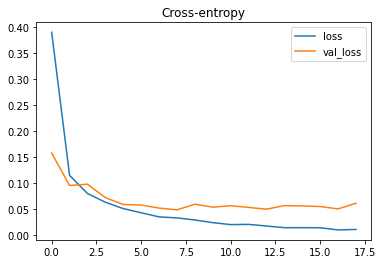

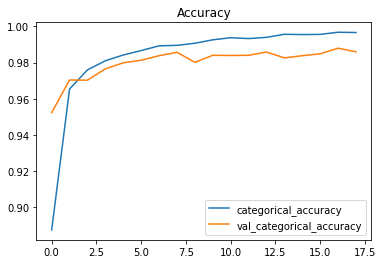

In [53]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot(title="Accuracy")

In [76]:
y_test = model.predict(x_test)
y_test = np.argmax(y_test, axis=1)

submission = pd.DataFrame(columns=['ImageId', 'Label'])
submission['ImageId'] = range(1, 1+len(y_test))
submission['Label'] = y_test

# sample_submission = pd.read_csv("digit-recognizer/sample_submission.csv")
# sample_submission
submission
submission.to_csv('digit-recognizer/submissions0.csv', index=False)

## Experiment

In [75]:
a = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0], 
    [1, 1, 1, 1, 1, 1, 1, 1], 
    [2, 2, 2, 2, 2, 2, 2, 2]
])

print(a.reshape(3, 2, 4))

[[[0 0 0 0]
  [0 0 0 0]]

 [[1 1 1 1]
  [1 1 1 1]]

 [[2 2 2 2]
  [2 2 2 2]]]
